In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [2]:
from google.colab import files
upload = files.upload()

Saving energydata_complete.csv to energydata_complete (1).csv


In [3]:
data = pd.read_csv("energydata_complete.csv")
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


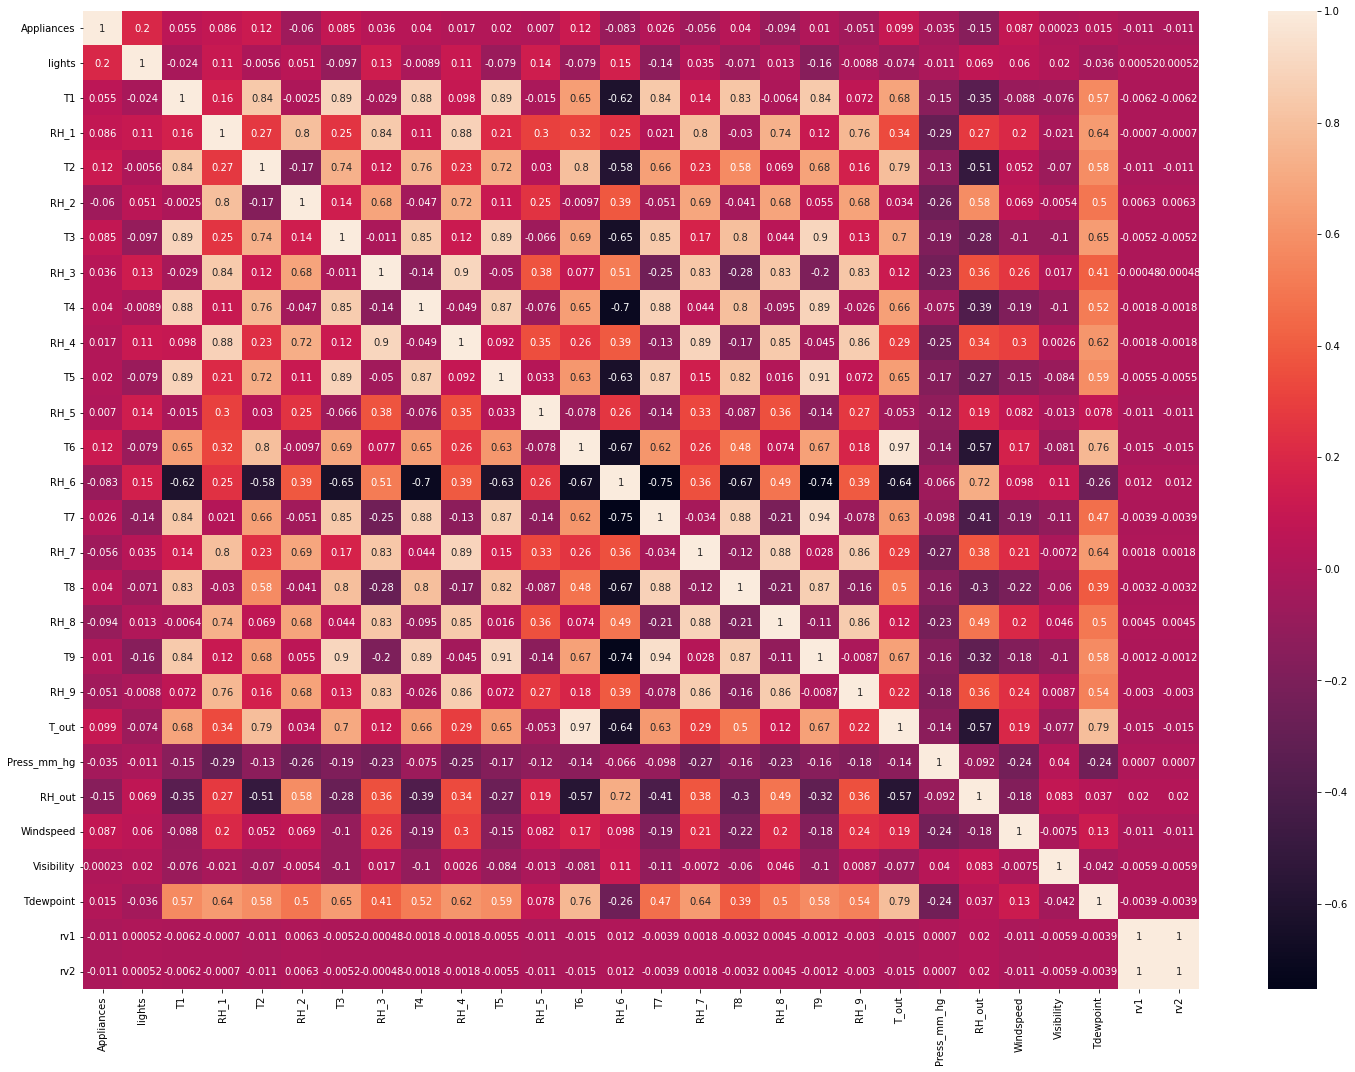

In [4]:
plt.figure(figsize = (25,18))
sns.heatmap(data.corr(), annot = True)

1. From the dataset, fit a linear model on the relationship between the temperature in the living room in Celsius (x = T2) and the temperature outside the building (y = T6). What is the R^2 value in two d.p.?

In [5]:
T2 = np.array((data['T2'].values)).reshape(-1,1)
T6 =  np.array((data['T6'].values).reshape(-1,1))

In [6]:
reg = LinearRegression()
reg = reg.fit(T2,T6)
print('R_square of T2 and T6 = ', (np.round(reg.score(T2,T6),2)))

R_square of T2 and T6 =  0.64


2. Normalize the dataset using the MinMaxScaler after removing the following columns: [“date”, “lights”]. The target variable is “Appliances”. Use a 70-30 train-test set split with a random state of 42 (for reproducibility). Run a multiple linear regression using the training set and evaluate your model on the test set. Answer the following questions:

What is the Mean Absolute Error (in two decimal places)?

In [7]:
df = data.drop(['date','lights'],axis = 1)

In [8]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
df_scale = scale.fit_transform(df)
df1 = pd.DataFrame(df_scale, columns = df.columns)
df1.head(4)

,Appliances,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.046729,0.32735,0.566187,0.225345,0.684038,0.215188,0.746066,0.351351,0.764262,0.175506,...,0.223032,0.677290,0.372990,0.097674,0.894737,0.500000,0.953846,0.538462,0.265449,0.265449
1,0.046729,0.32735,0.541326,0.225345,0.682140,0.215188,0.748871,0.351351,0.782437,0.175506,...,0.226500,0.678532,0.369239,0.100000,0.894737,0.476190,0.894872,0.533937,0.372083,0.372083
2,0.037383,0.32735,0.530502,0.225345,0.679445,0.215188,0.755569,0.344745,0.778062,0.175506,...,0.219563,0.676049,0.365488,0.102326,0.894737,0.452381,0.835897,0.529412,0.572848,0.572848
3,0.037383,0.32735,0.524080,0.225345,0.678414,0.215188,0.758685,0.341441,0.770949,0.175506,...,0.219563,0.671909,0.361736,0.104651,0.894737,0.428571,0.776923,0.524887,0.908261,0.908261


In [9]:
X = df1.drop("Appliances", axis = 1)
y = df1['Appliances']

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3, random_state = 42)

In [11]:
Model = LinearRegression()
Model = Model.fit(X,y)

In [12]:
y_pred = Model.predict(X_test)
print('Mean Absolute Value = ' , np.round(mean_absolute_error(y_test,y_pred),2))

Mean Absolute Value =  0.05


3. What is the Residual Sum of Squares (in two decimal places)?

In [13]:
rss = np.sum(np.square(y_test -y_pred))
print('Residual Sum of Squares = ' , np.round(rss,2))

Residual Sum of Squares =  45.19


4. What is the Root Mean Squared Error (in three decimal places)?

In [14]:
print('Root Mean Squared Error = ' , np.round(np.sqrt(mean_squared_error(y_test,y_pred)),3))

Root Mean Squared Error =  0.087


5. 
What is the Coefficient of Determination (in two decimal places)?

In [15]:
print('R Square = ' , np.round(r2_score(y_test,y_pred),2))

R Square =  0.15


6.
Obtain the feature weights from your linear model above. Which features have the lowest and highest weights respectively?

In [16]:
weight = pd.DataFrame((Model.coef_))
weights = np.transpose(weight)
weights.columns = X.columns
weights

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,0.003452,0.545721,-0.261076,-0.479066,0.285431,0.100961,0.030924,0.042679,-0.000196,0.014802,...,-0.198399,-0.033978,-0.309266,0.004952,-0.064669,0.027855,0.01068,0.104846,-0.000957,-0.000957


In [17]:
w = np.array(weights)
print('The feature with the lowest coefficient is RH_2 = ', np.min(w))
print('The feature with the lowest coefficient is RH_1 = ' ,np.max(w))

The feature with the lowest coefficient is RH_2 =  -0.47906555343328405
The feature with the lowest coefficient is RH_1 =  0.5457206172966362


7. Train a ridge regression model with an alpha value of 0.4. Is there any change to the root mean squared error (RMSE) when evaluated on the test set?

In [18]:
ridge = Ridge(alpha = 0.4)
ridge = ridge.fit(X_train,y_train)

In [19]:
yhat = ridge.predict(X_test)

In [20]:
print('Root Mean Squared Error of Ridge = ' , np.round(np.sqrt(mean_squared_error(y_test,yhat)),3))

Root Mean Squared Error of Ridge =  0.088


No, there is no changes in the Root mean Square.

8. Train a lasso regression model with an alpha value of 0.001 and obtain the new feature weights with it. How many of the features have non-zero feature weights?

In [21]:
lasso = Lasso(alpha = 0.001)
lasso = lasso.fit(X_train,y_train)
lasso.coef_

array([ 0.        ,  0.01787993,  0.        , -0.        ,  0.        ,
        0.        , -0.        ,  0.        , -0.        ,  0.        ,
        0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.00011004, -0.        , -0.        ,  0.        , -0.        ,
       -0.04955749,  0.00291176,  0.        ,  0.        , -0.        ,
       -0.        ])

Only 4 of the features have non-zero feature weight

9. What is the new RMSE with the lasso regression? (Answer should be in three (3) decimal places)

In [22]:
y_lasso = lasso.predict(X_test)
print('Root Mean Squared Error of Lasso = ' , np.round(np.sqrt(mean_squared_error(y_test,y_lasso)),3))

Root Mean Squared Error of Lasso =  0.094
